# Comparing Means

We can compare two groups to see if they differ in some measure (represented by a continuous variable) significantly by comparing each group's mean value of that continuous variable. 
In other words, we compare subgroups of a categorical value by comparing the mean of a continuous variable across each of those subgroups.

The statistical question you are asking: Are these two groups from the same population? 

A test comparing means can help us answer questions like:

- Are the salaries of the marketing department higher than the company average? 
- Do customers who receive marketing emails spend more money than customers who do not receive marketing emails? 
- Are sales for product A higher when we run a promotion for it than when we do not run a promotion for it?

For a comparing means test, there are different options based on your data. In this lesson we will explore both parametric and non-parametric tests. 

__________________________________________


## Parametric Vs. Non-Parametric

The difference between **Parametric** and **Non-Parametric** tests is that parametric tests rely on a distribution. 

There are other assumptions about the data made when running these tests, but let's talk about this assumption of normality first.If your sample is > 500, you don't need to worry about normality assumption due to the **central limit theorem**. If your sample is < 30 and not at all normal, then use a non-parametric test. In between, "it depends". The smaller your sample, the more normal your distribution needs to be. 

But what is the Central Limit Theorem and why does it matter? 

__________________________________________

## Central Limit Theorem

The central limit theorem tells us that the **sampling distribution** for a random variable is normally distributed, even if the underlying random variable is not. In other words, the distribution of the average values of many samples taken of that one sample, is normal. 

Let's take the example of rolling a dice. We know that rolling a die is a random process, but imagine an experiment where we roll 10 dice and take the average roll. If we performed this experiment many times and plotted the resulting calculated averages of 10 dice rolls, we would expect to see a normal distribution.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

data = np.random.randint(1, 7, (nrows, ncols))

data[:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [2]:
calculated_averages = data.mean(axis=1)
calculated_averages

array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

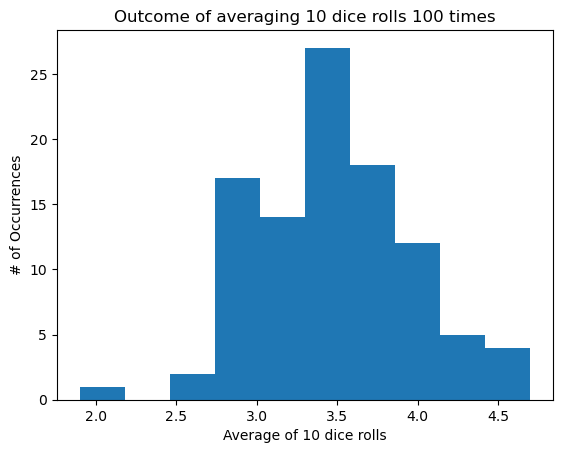

In [3]:
plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurrences')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')
plt.show()

This concept allows us to make calculations using the normal distribution based on the values we calculate from our samples. 

__________________________________________


## Comparing Tests that Compare Means

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*|Non-parametric Test|  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|1 sample t-test (`stats.ttest_1samp`)|Normally Distributed\*\*|1 sample Wilcoxon signed rank test (`stats.wilcoxon`)|   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples| 2 sample t-test (Independent t-test)(`stats.ttest_ind`)|Independent, Normally Distributed\*\*, Equal Variances\*\*\*|Mann-Whitney's test (`stats.mannwhitneyu`)|   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA (`stats.f_oneway`)|Independent, Normally Distributed\*\*, Equal Variances|Kruskal-Wallis test (`stats.kruskal`)|   

\*If assumptions can't be met, the equivalent non-parametric test can be used.   
\*\*Normal Distribution assumption can be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accommodate this assumption. 


All the comparing means tests will follow the regular process with an additional step:


1. Form hypotheses and set a desired confidence level
1. **Verify assumptions**
1. Calculate the appropriate test statistics and p-value
1. Conclude based on the above statistics


When concluding based on our p-values, we have to take into account whether it is a 1-tail or 2-tail test (different from 1 sample or 2 sample t-test). A 1-tailed test means our alternative hypothesis is checking if one subgroup is larger than the other OR our alternative hypothesis is checking if one subgroup is smaller than the other. A 2-tail test is checking if there is any difference in subgroups, regardless of direction. 

Our null hypothesis corresponds to a t-score of 0 (if there is no difference in the means, the numerator in our t calculation would come out to 0). If the null hypothesis is true, our t-scores will follow a normal distribution and will be centered around 0. That is, if the null hypothesis is true, and we ran our experiment many many times, we would expect to get slightly different t-statistics each time. If we plotted the resulting t-statistics we would expect to see an approximately normal curve.

Therefore, for a 2-tailed test, we take the p-value as is and compare it to alpha as normal. For a 1-tailed test, we divide our p-value in half (since it is only looking in one direction) **AND** compare our t-statistic to zero (greater than zero to test if it is higher or less than zero to test if it is lower).  

__________________________________________


## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Form hypotheses and set a desired confidence level

    ||||  
    |-----|-----|---------|  
    |Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
    |Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
    |Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
    |Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

2. Verify Assumptions 
    - Normal Distribution
        - Or at least 500 observations (CLT)
        - Or at least 30 observations and "kinda" normal

3. Calculate the appropriate test statistics and p-value
    - `scipy.stats.ttest_1samp`
        - inputs
            - an array of all observed values of the subgroup
            - the population mean
        - outputs
            - t-statistic
            - p-value

4. Conclude based on the above statistics
    - For 2-tail, $p$ compared to $\alpha$
    - For 1-tail higher than, $p$/2 compared to $\alpha$ and $t$ > 0
    - For 1-tail lower than, $p$/2 compared to $\alpha$ and $t$ < 0
    
We will use the telco_churn database to work through examples. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import env

db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'  
df = pd.read_sql('SELECT * FROM customers', db_url)  

In [5]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

I believe customers who churn are charged more (monthly average) than the overall average monthly charges.  

### Example 1

Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers? 

We will use a 1 sample (comparing 1 group to the average), 1-tailed ("significantly higher") t-test.  

**1. Form hypotheses and set a desired confidence level**

$H_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers  

In [6]:
alpha = .05

**2. Verify assumptions**

In [7]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

Our churn sample is large enough, as is overall count, to meet the assumptions of normal distributions. 

**3. Calculate the appropriate test statistics and p-value**

- scipy.stats.ttest_1samp

In [8]:
# an array of all observed values of the subgroup
churn_sample = df[df.churn == 'Yes'].monthly_charges

# the population mean
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

16.96540308050567 1.8703196496911995e-60 0.05


**4. Conclude based on the above statistics**

For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [9]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


### Example 2

Is there any difference in monthly charges for customers who churned and customers who don't churn?

We will use a 1 sample (comparing 1 group to the average), 2-tailed (significantly different) t-test. 

**1. Form hypotheses and set a desired confidence level**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers != Mean of monthly charges of all customers  

$\alpha$: See above

**2. Verify assumptions**

See above

**3. Calculate the appropriate test statistics and p-value**

In [10]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p

(16.96540308050567, 3.740639299382399e-60)

**4. Conclude based on the above statistics**

Since we are looking at any difference in monthly charges (regardless of higher or lower), we will use a 2-tail test. Is p-value less than alpha?

In [11]:
p < alpha

True

We reject the null hypothesis.

### Example 3

The mean monthly charges of customers who have turned is less than the mean monthly charges of all customers.

We will use a 1 sample (comparing 1 group to the average), 1-tailed (significantly lower) t-test. 

**1. Form hypotheses and set a desired confidence level**


$H_{0}$: Mean of monthly charges of churned customers >= Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers < Mean of monthly charges of all customers  

$\alpha$: See above

**2. Verify assumptions**

See above

**3. Calculate the appropriate test statistics and p-value**

In [12]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p

(16.96540308050567, 3.740639299382399e-60)

**4. Conclude based on the above statistics**

Is 1/2 of p-value < alpha AND t-stat < 0? 

In [13]:
print(p/2 < alpha)
print(t < 0)

True
False


We fail to reject the null hypothesis.

__________________________________________


## Independent T-Test (a.k.a. Two Sample T-Test)

Goal: Compare mean of group a to mean of group b. 


1. Form hypotheses and set a desired confidence level

    ||||  
    |-----|-----|---------|  
    |Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b}$|  
    |Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{a} != \mu_{b}$|  
    |Alternative Hypothesis (1-tail, a is significantly smaller than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|  
    |Alternative Hypothesis (1-tail, a is significantly larger than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|      

2. Verify Assumptions:  
    - Normal Distribution
        - Or at least 500 observations (CLT)
        - Or at least 30 observations and "kinda" normal
    - Independent samples  
    - Equal Variances (or set method argument to False when not)  

3. Calculate the appropriate test statistics and p-value
    - `scipy.stats.ttest_ind`
        - inputs
            - an array of observed values from one subgroup
            - an array of observed values from the other subgroup
        - outputs
            - t-statistic
            - p-value

4. Conclude based on the above statistics
    - For 2-tail, $p$ compared to $\alpha$
    - For 1-tail higher than, $p$/2 compared to $\alpha$ and $t$ > 0
    - For 1-tail lower than, $p$/2 compared to $\alpha$ and $t$ < 0

### Example 1

I believe customers who churn are charged more (monthly average) than customers who don't churn. 
Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn? 

We will use a 2 sample (comparing 2 groups to each other), 1-tailed (significantly higher) t-test.  

In [14]:
#an array for each subgroup
churn_sample = df[df.churn == 'Yes'].monthly_charges
no_churn_sample = df[df.churn == 'No'].monthly_charges

**1. Form hypotheses and set a desired confidence level**

$H_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of customers who haven't churned  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of customers who haven't churned  

In [15]:
alpha = .05

**2. Verify Assumptions**

1. Independent Samples? 
    - YES! No observations in the churn sample exist in the no-churn sample. 

2. Normal Distribution?
    - YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal)?

In [16]:
print(churn_sample.var())
print(no_churn_sample.var())

608.4141833954315
966.7527670734293


- NO! So we will set the argument of equal_var to False. 

**3. Calculate the appropriate test statistics and p-value**

In [17]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
t, p

(18.407526676414673, 8.59244933154705e-73)

**4. Conclude based on the above statistics**

In [18]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [19]:
if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


### Example 2

Are charges of customers who churn *significantly different* than those who do not churn? 

We will use a 2 sample (comparing 2 groups to each other), 2-tailed (significantly different) t-test.  

**1. Form hypotheses and set a desired confidence level**

$H_{0}$: charges of customers who churn equals that of those who don't churn.   

$H_{a}$: charges of customers who churn is not equal to that of those who don't churn. 

alpha = See above

**2. Verify assumptions**

See above

**3. Calculate the appropriate test statistics and p-value**

In [20]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
t, p

(18.407526676414673, 8.59244933154705e-73)

**4. Conclude based on the above statistics**

Is the p-value less than alpha?

In [21]:
print("Reject null hypothesis? ", p < alpha)

Reject null hypothesis?  True


### Example 3

Are charges of customers who churn *significantly less* than those who do not churn? 

We will use a 2 sample (comparing 2 groups to each other), 1-tailed (significantly lower) t-test.  

**1. Form hypotheses and set a desired confidence level**

$H_{0}$: charges of customers who churn equals or greater than that of those who don't churn.   

$H_{a}$: charges of customers who churn is less than that of those who don't churn. 

alpha: See above

**2. Verify assumptions**

See above

**3. Calculate the appropriate test statistics and p-value**

In [22]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
t, p

(18.407526676414673, 8.59244933154705e-73)

**4. Conclude based on the above statistics**

Is p/2 < alpha AND is t < 0?

In [23]:
print("Is p/2 < alpha? ", p / 2 < alpha)
print("Is t < 0? ", t < 0)

Is p/2 < alpha?  True
Is t < 0?  False


We fail to reject the null hypothesis.

__________________________________________


## ANOVA Analysis of Variance

Goal: Compare means of groups a, b & c. 


1. Form hypotheses and set a desired confidence level

    ||||  
    |-----|-----|---------|  
    |Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b} == \mu_{c}$|  
    |Alternative Hypothesis (significantly different)|$H_{a}$|$\mu_{a} != \mu_{b} != \mu_{c}$|  

2. Verify Assumptions:  
    - Normal Distribution
        - Or at least 500 samples (CLT) 
        - Or at least 30 observations and "kinda" normal
    - Independent samples  
    - Equal Variances

3. Calculate the appropriate test statistics and p-value
    - `scipy.stats.f_oneway`
        - inputs
            - an array of observed values for every subgroup
        - outputs
            - f-statistic
            - p-value

4. Conclude based on the above statistics

### Example 1

Is the sepal length significantly different across the different species of iris? 

Since there are three different species of iris, there are three subgroups that we are comparing and will use the ANOVA test. 

In [24]:
df = sns.load_dataset('iris')
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [25]:
df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

**1. Form hypotheses and set a desired confidence level**

$H_{0}$: population means of the sepal length for the three species, versicolor, virginica & setosa, are all equal.  

$H_{a}$: population means of the sepal length for the three species, versicolor, virginica & setosa, are NOT all equal. 

In [26]:
alpha = .05

**2. Verify assumptions**

In [27]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length

Independent samples? YES!  

Normal Distribution? 

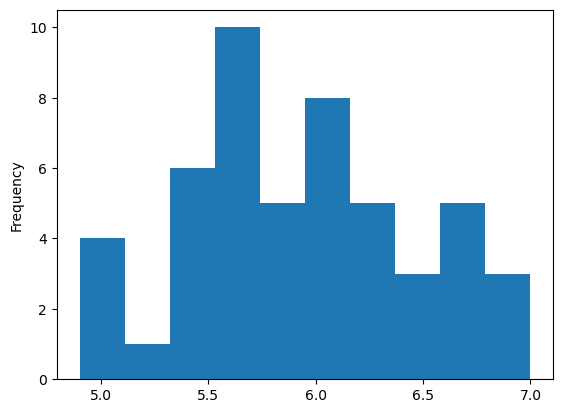

In [28]:
versicolor_sepal_length.plot.hist();

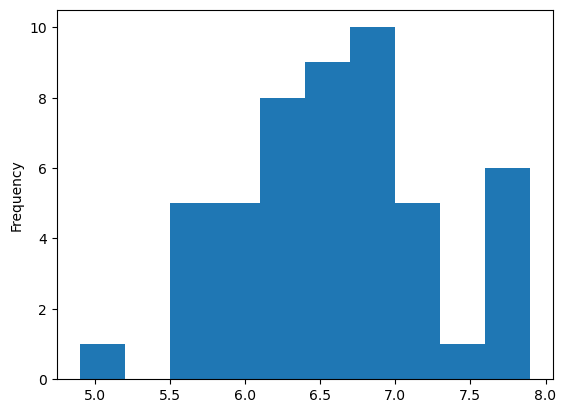

In [29]:
virginica_sepal_length.plot.hist();

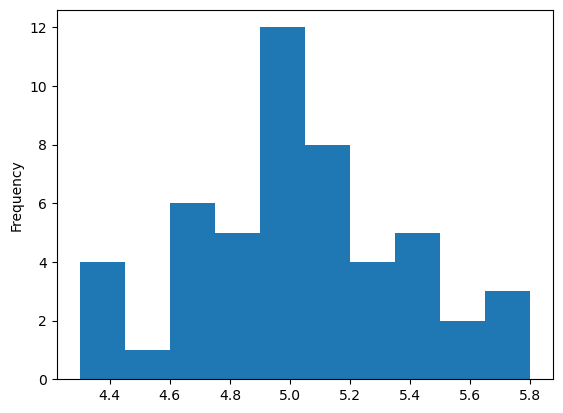

In [30]:
setosa_sepal_length.plot.hist();

- YES! The distributions are mostly normal  

Equal Variances? 

In [31]:
print(versicolor_sepal_length.var())
print(virginica_sepal_length.var())
print(setosa_sepal_length.var())

0.2664326530612246
0.40434285714285706
0.12424897959183666


- YES! The variance is very small so the differences are minor. 

**3. Calculate the appropriate test statistics and p-value**

In [32]:
f, p = stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)
f, p

(119.26450218450472, 1.6696691907693648e-31)

**4. Conclude based on the above statistics**

In [33]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Example 2

Is the horsepower of a car different in cars from different origins?

In [34]:
df = sns.load_dataset('mpg')
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [35]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Drop nulls

In [36]:
df = df[~df['horsepower'].isna()]

In [37]:
usa_hp = df[df.origin == 'usa'].horsepower
japan_hp = df[df.origin == 'japan'].horsepower
eu_hp = df[df.origin == 'europe'].horsepower

**1. Form hypotheses and set a desired confidence level**

$H_{0}$: hp is the same across all origins

$H_{a}$: hp is not the same across all origins

$\alpha$ is already set to .05

**2. Verify assumptions**

Independent: YES!

Normal: YES!

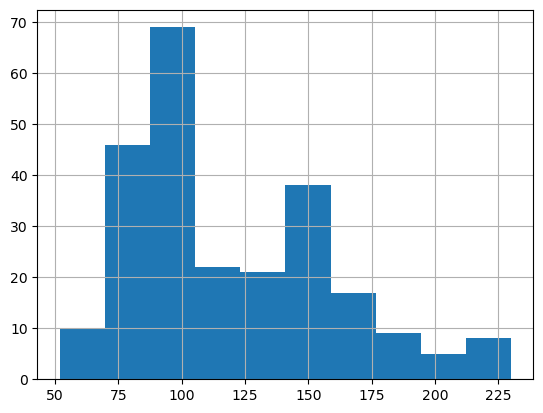

In [38]:
usa_hp.hist();

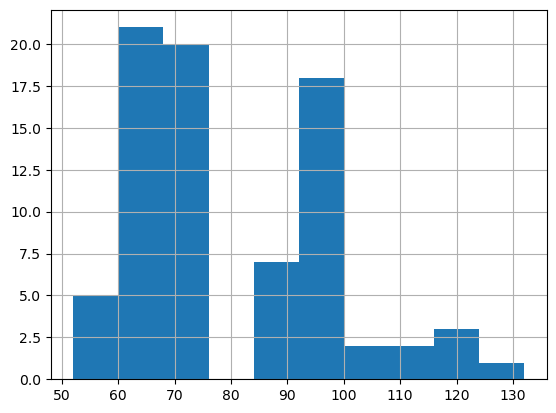

In [39]:
japan_hp.hist();

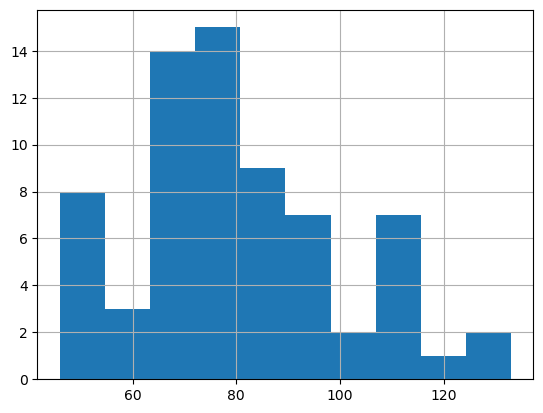

In [40]:
eu_hp.hist();

Equal Variance: no

In [41]:
usa_hp.var()

1591.8336567413864

In [42]:
japan_hp.var()

317.5238558909445

In [43]:
eu_hp.var()

406.3397717295875

**3. Calculate the appropriate test statistics and p-value**

In [44]:
stats.kruskal(usa_hp, japan_hp, eu_hp)

KruskalResult(statistic=105.59475799843663, pvalue=1.1759521262123952e-23)

**4. Conclude based on the above statistics**

In [45]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


Using Kruskal-Wallis test, non-parametric test for ANOVA, shows us that the mean HP of the cars from the 3 origins is significantly different. 

## Exercises

Continue working in your `hypothesis_testing` notebook.

1. Answer with the type of test you would use (assume normal distribution): 
    - Is there a difference in grades of students on the second floor compared to grades of all students? 
    - Are adults who drink milk taller than adults who don't drink milk? 
    - Is the price of gas higher in Texas or in New Mexico? 
    - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.  A sample of 40 sales from office #1 revealed a mean of 90 days and a standard  deviation of 15 days. A sample of 50 sales from office #2 revealed  a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

3. Load the `mpg` dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?